In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Import data into Python environment.

In [5]:
df=pd.read_csv('C:\Programming\VS code\simplilearn material\data science with python project/comcast_telecom_complaints_data.csv')

In [6]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,211976,Fraudulent claims reported to collections agency,04/01/2015,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No
1,212818,Incorrect Billing,04/01/2015,04-Jan-15,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No
2,212507,Comcast Cable,04/01/2015,04-Jan-15,3:54:43 PM,Internet,Franklin,Tennessee,37067,Closed,No
3,213355,Comcast is ignoring me now. They are making NO...,04/01/2015,04-Jan-15,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No
4,211904,Unable to get in touch with anyone that has th...,04/01/2015,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No


# Checking the Null value in dataset 


In [7]:
df.isnull().sum().any()


False

#  Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
# converting date_month_year into datetime module
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])



In [9]:
#Getting month and day wise details of the complaints 
df['Month']=pd.DatetimeIndex(df['Date_month_year']).month_name()
df['Days']=pd.DatetimeIndex(df['Date_month_year']).day

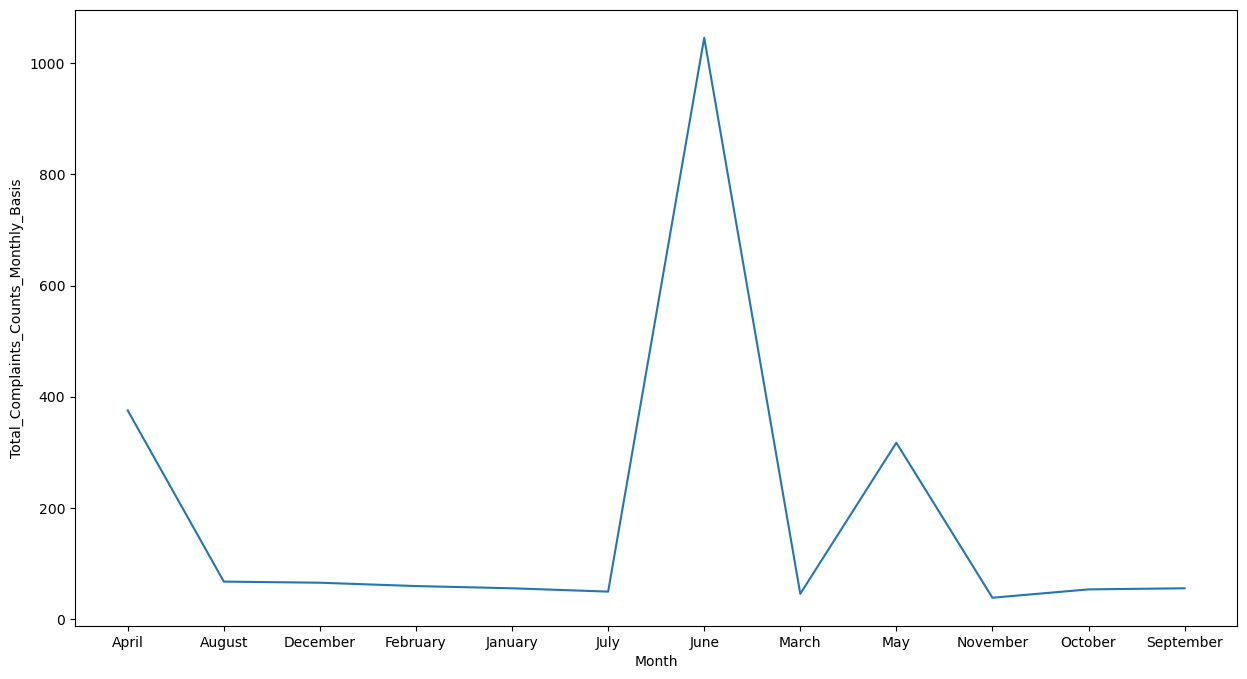

In [10]:
#Provide the trend chart for the number of complaints at monthly
Monthly_count= df.groupby('Month')['Ticket #'].count().reset_index(name='Total_Complaints_Counts_Monthly_Basis')
Monthly_count
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='Total_Complaints_Counts_Monthly_Basis',data=Monthly_count)
plt.show()

In [11]:
#Provide the trend chart for the number of complaints at daily basis.
Daily_count= df.groupby('Days')['Ticket #'].count().reset_index(name='Total_Complaints_Counts_Daily_Basis')


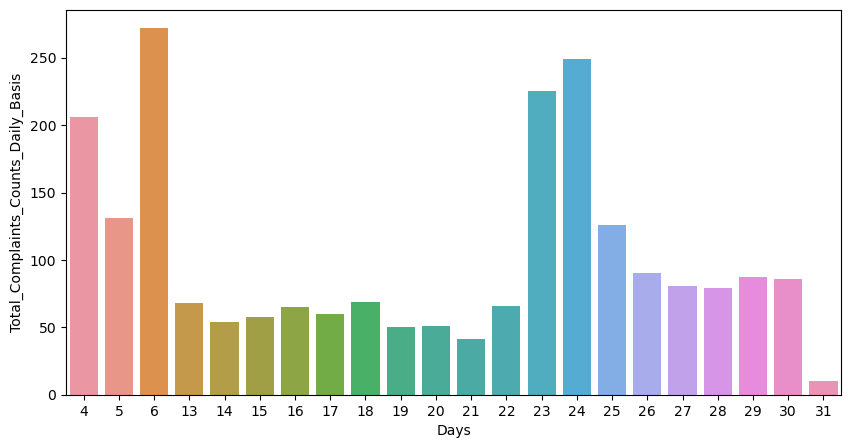

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='Days',y='Total_Complaints_Counts_Daily_Basis',data=Daily_count)

plt.show()

# Provide a table with the frequency of complaint types.

In [13]:
df_freq= df['Customer Complaint'].value_counts().reset_index(name='Frequencies_complaint_types')
df_freq

,index,Frequencies_complaint_types
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Over billing Comcast,1
1837,Internet problems,1
1838,Comcast - internet service complaint,1
1839,Increase in Price of internet,1


# Which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [14]:
df_freq .head(1)

,index,Frequencies_complaint_types
0,Comcast,83


# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [15]:
df['Final_Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

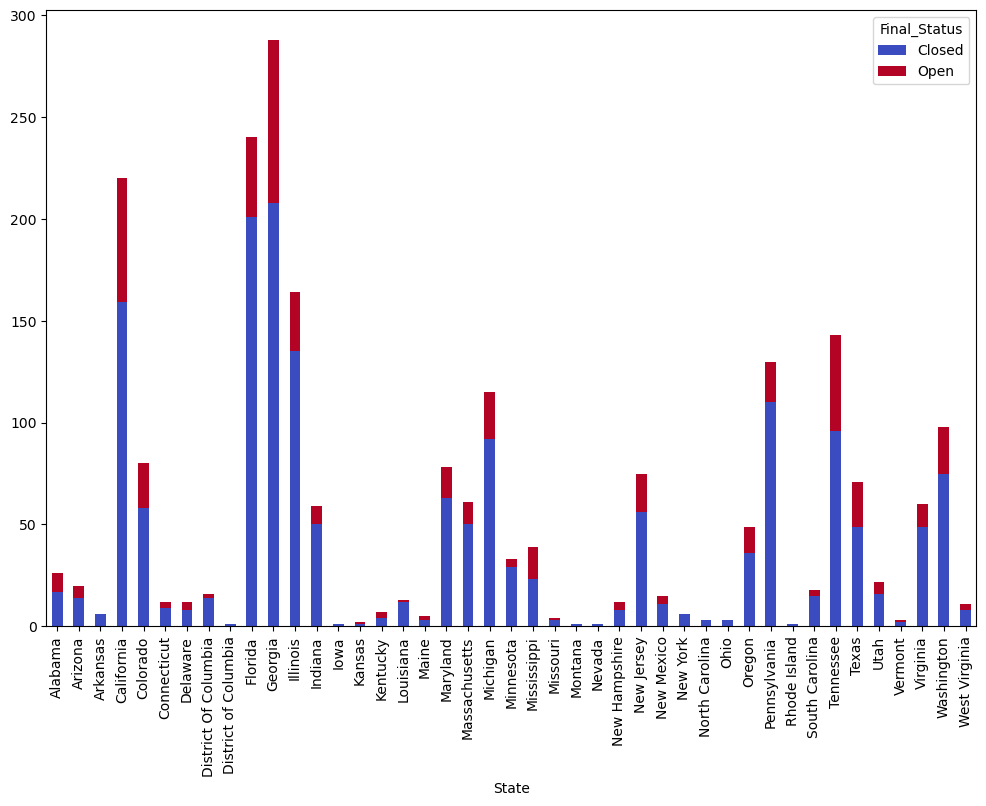

In [16]:
crosstab=pd.crosstab(index=df['State'],columns=df['Final_Status'])
crosstab.plot(kind='bar',stacked=True,figsize=(12,8),colormap='coolwarm')
plt.show()

# Which state has the maximum complaints

In [17]:
df_maxcomp= df.groupby('State')['Customer Complaint'].count().reset_index(name='Complaint_n0.')
df_maxcomp.sort_values(by='Complaint_n0.',ascending=False).head(1)
#Georgia state 

,State,Complaint_n0.
10,Georgia,288


#  Which state has the highest percentage of unresolved complaints

In [18]:
df_unresolved_per = df.loc[df['Final_Status'] == 'Open',['State']].value_counts()

df_unresolved_per.head(1)/df_unresolved_per.sum()*100

State  
Georgia    15.473888
dtype: float64

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [19]:
df[df['Final_Status'] == 'Closed'].groupby('Final_Status')['Received Via'].value_counts(normalize=True)*100

Final_Status  Received Via      
Closed        Customer Care Call    50.615114
              Internet              49.384886
Name: Received Via, dtype: float64

# INSIGHTS 